In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt


In [77]:
train=pd.read_csv("zomato.csv")

In [78]:
train.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [79]:
df=train[["votes","approx_cost(for two people)"]]

In [80]:
df.head()

,votes,approx_cost(for two people)
0,775,800
1,787,800
2,918,800
3,88,300
4,166,600


In [81]:
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'],errors='coerce')


D:\anacondaINstall\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
df["approx_cost(for two people)"].isnull().sum()

7263

In [83]:
df.fillna(df["approx_cost(for two people)"].mean(),inplace=True)

D:\anacondaINstall\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [84]:
sc=StandardScaler()
df=sc.fit_transform(df)

D:\anacondaINstall\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\anacondaINstall\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [85]:
df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

<function matplotlib.pyplot.show(*args, **kw)>

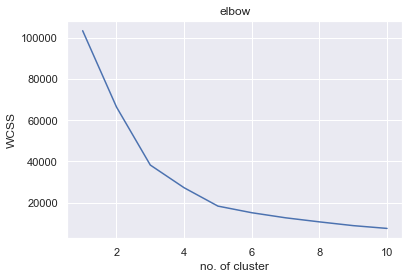

In [88]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('elbow')
plt.xlabel("no. of cluster")
plt.ylabel("WCSS")
plt.show

In [89]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10)
y_kmeans=kmeans.fit_predict(df)

In [90]:
y_kmeans

array([4, 4, 4, ..., 1, 1, 1])

In [91]:
new=pd.DataFrame(columns=['name','categories'])

In [92]:
new["name"]=train["name"]

In [93]:
new["categories"]=y_kmeans

In [94]:
new

,name,categories
0,Jalsa,4
1,Spice Elephant,4
2,San Churro Cafe,4
3,Addhuri Udupi Bhojana,0
4,Grand Village,4
5,Timepass Dinner,4
6,Rosewood International Hotel - Bar & Restaurant,4
7,Onesta,3
8,Penthouse Cafe,4
9,Smacznego,1


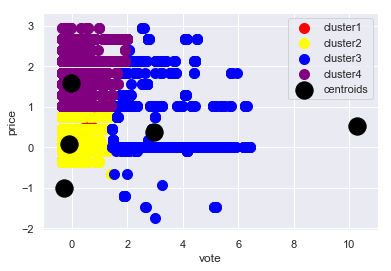

In [95]:
plt.scatter(df[y_kmeans==0,0],df[y_kmeans==0,0],s=100,c='red',label='cluster1')
plt.scatter(df[y_kmeans==1,0],df[y_kmeans==1,1],s=100,c='yellow',label='cluster2')
plt.scatter(df[y_kmeans==3,0],df[y_kmeans==3,1],s=100,c='blue',label='cluster3')
plt.scatter(df[y_kmeans==4,0],df[y_kmeans==4,1],s=100,c='purple',label='cluster4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='black',label='centroids')
plt.xlabel("vote")
plt.ylabel("price")
plt.legend()
plt.show()

In [96]:
new.to_csv("newZomato.csv")